In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#reading test data
df=pd.read_csv('polynomial_train.csv')
array=df.to_numpy()
x=array[:40000,1:4]
Y=array[:40000,4]
x_test=array[40000:,1:4]
y_test=array[40000:,4]



In [2]:
#feature scaling using z_score method
def feature_scaling1(x):
    shape=x.shape
    m=shape[0]
    if len(shape)==1:
        n=1
    else:
        n=shape[1]
    for i in range(n):
        sigma_x=np.sum(x[0:,i])
        mean_x=sigma_x/m
        deviation=(x[0:,i]-mean_x)**2
        Std_D=np.sum(deviation)
        Std_D/=m
        Std_D=Std_D**(.5)
        """Std_D=np.std(x[0:,i], dtype = np.float64)"""
        x[0:,i]=x[0:,i]-mean_x
        x[0:,i]/=Std_D
    return x
#x=feature_scaling(x)


In [3]:
#normalising the data
def feature_scaling(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x=(x-mean)/std
    return x,mean,std
x,mean,std=feature_scaling(x)

In [4]:
def adding_features(x,n):
    x_a=x[:,0]
    x_b=x[:,1]
    x_c=x[:,2]
    for k in range (n-1):
        for i in range (k+3):
            for j in range (k+3):
                if i+j>k+2:
                    continue
                x=np.append((x_a.reshape(-1,1)**i)*(x_b.reshape(-1,1)**j)*(x_c.reshape(-1,1)**(k+2-(i+j))),x,axis=1)
    return x
x=adding_features(x,5)            

In [5]:
#Calctulating the value of cost 
def cost_function(x,y,w,b):
    shape=x.shape
    m=shape[0]           #no.of rows(training examples)
    total_cost=0
    for i in range(m):
        y_predicted=np.dot(x[i],w)+b
        cost=(y[i]-y_predicted)**2
        total_cost+=cost
    
    total_cost=(total_cost)/(2*m)
    return total_cost


In [6]:
#calculating the value of gradient
def gradient_function(x,y,w,b):
    shape=x.shape
    m=shape[0]    #no.of rows(training examples)
    if len(shape)==1:
        n=1   #no.of columns
    else:
        n=shape[1]   #no.of columns
    dJ_b=np.zeros(1)
    dJ_w=np.zeros(n)
    y_predicted=(np.matmul(w,x.T)).T+b
    dJ_w=np.matmul((y_predicted-y),x)
    dJ_b=np.sum(y_predicted-y)

    dJ_w/=m
    dJ_b/=m
    return dJ_w,dJ_b
            

In [7]:
#applying gradient decent 
def gradient_decent(x,y,w,b,alpha,iterations):
    w_new=w
    b_new=b
    
    for i in range(iterations):
        dJ_w,dJ_b=gradient_function(x,y,w_new,b_new)
        w_new-=(alpha)*(dJ_w)
        b_new-=(alpha)*(dJ_b)
    return w_new,b_new

In [8]:
w=np.zeros(55)
b=0

print(cost_function(x,Y,w,b))


3153645166664.0977


In [9]:
#change in cost with iterations 
def plottingcost(x,y,w,b,alpha,iterations):
    itera_t=iterations
    n=math.floor(iterations/10)
    cost=np.zeros(n)
    m=np.arange(n)
    for i in range(n):
        cost[i]=cost_function(x,y,w,b)
        w,b=gradient_decent(x,y,w,b,alpha,10)
        print(cost[i])
    plt.plot(m,cost)
    return w,b,cost[n-1]

In [10]:
#R2score
def R2score(y_pred,y_act):
    y_act_mean=np.mean(y_act)
    a=np.sum((y_pred-y_act)**2)
    b=np.sum((y_act-y_act_mean)**2)
    R2score_accuracy=1-(a/b)
    return R2score_accuracy

3153645166664.0977
2030525135.6304471
626058060.3358519
408450887.71162426
314372066.5899052
250099547.39638492
201982678.70932654
165239423.3883316
136926788.9488264
114939399.15526716
97723523.48786795
84122965.47659622
73273889.07495837
64528879.223515734
57401309.261205055
51524348.333769724
46620644.294396326
42479835.20559907
38941824.835031755
35884316.050901495
33213498.505991016
30857078.89160689
28759054.81065583
26875789.07676331
25173055.68891662
23623813.08526538
22206522.629353527
20903876.480501913
19701833.306111764
18588885.819010854
17555503.14885084
16593705.261553762
15696737.262279095
14858819.37095528
14074954.32299668
13340778.425144082
12652445.861894097
12006538.380832009
11399994.393520977
10830052.968105072
10294209.276778651
9790178.883108828
9315868.876155207
8869354.329643546
8448858.921993785
8052738.824586369
7679469.172209033
7327632.586937477
6995909.3466872685
6683068.881348227
6387962.349547363
6109516.102879459
5846725.8857572125
5598651.650867685
5

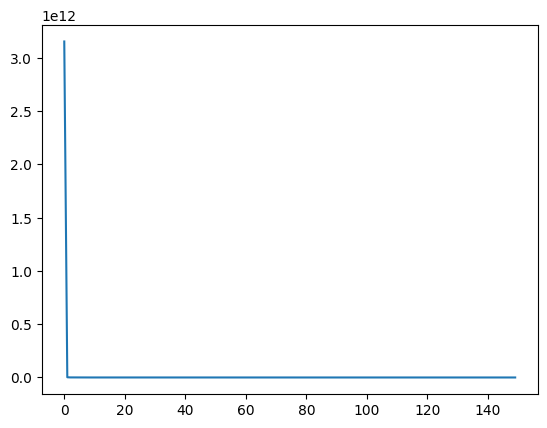

In [11]:
wnw,bnw,costnw=plottingcost(x,Y,w,b,0.001,1500)

In [12]:
#testing the optimised parameters using test data onthe basis of R2score
x_test=(x_test-mean)/std
x_test=adding_features(x_test,5)
y_predicted=(np.matmul(wnw,x_test.T)).T+bnw
print(R2score(y_predicted,y_test))


0.9999996850326017
